# Assignment: Linear Regression

## Import the required packages

In [143]:
import numpy as np
from matplotlib import pyplot as plt

## Function to calculate the Gradient descent

In [144]:
def gradient_descent(x, y, theta, alpha, m, max_steps):
    # HERE YOU HAVE TO IMPLEMENT THE UPDATE OF THE PARAMETERS
    thetaHist = np.empty([max_steps, 2])
    for i in range(0, max_steps):
        cost, loss = cost_function(x, y, theta)
        theta = theta - (1 / m) * alpha * cost
        thetaHist[i] = theta
    return theta, thetaHist

## Function to calculate the cost function

In [145]:
def cost_function(x, y, theta):
    # HERE YOU HAVE TO IMPLEMENT THE COST FUNCTION
    loss = np.dot(x, theta) - y
    cost = np.dot(x.transpose(), loss)
    return cost, loss

## Define some training data

In [146]:
def init():
    x = np.array([[1, 0], [1, 0.5], [1, 1], [1, 1.5], [1, 2], [1, 2.5], [1, 3], [1, 4], [1, 5]])
    y = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 4, 5])
    return x, y


def init_coefficients(a1, b1, a2, b2):
    x = b1 + a1 * np.random.rand(100, )
    x_ = np.c_[np.ones((100, 1)), x]  # add x0 = 1 to each instance
    y = b2 + a2 * x + np.random.rand(100, )
    return x_, y

## Cost function


In [147]:
def plot_cost_function(x, y, theta0, theta1, m, J):

    for i in range(0, len(theta0)):
        for j in range(0, len(theta1)):
            c, loss = cost_function(x, y, [theta0[i], theta1[j]])
            J[i, j] = c.sum() / m

    theta0, theta1 = np.meshgrid(theta0, theta1)
    fig2 = plt.figure(2)
    ax = fig2.add_subplot(121, projection="3d")
    ax.plot_surface(theta0, theta1, np.transpose(J))
    ax.set_xlabel('theta 0')
    ax.set_ylabel('theta 1')
    ax.set_zlabel('Cost J')
    ax.set_title('Cost function Surface plot')
    ax = fig2.add_subplot(122)
    ax.contour(theta0, theta1, np.transpose(J))
    ax.set_xlabel('theta 0')
    ax.set_ylabel('theta 1')
    ax.set_title('Cost function Contour plot')
    fig2.subplots_adjust(bottom=0.1, right=1.5, top=0.9)
    plt.show()
    return J, theta0, theta1

## Gradient descent implementation
Here we implement Gradient Descent


In [148]:
def plot_hypothesis_function(t, x, y, alpha, m, max_steps, theta0, theta1, J, hist):
    t, thetaHist = gradient_descent(x, y, t, alpha, m, max_steps)
    if hist:
        plt.figure(3)
        plt.contour(theta0, theta1, np.transpose(J))
        plt.plot(thetaHist[:, 0], thetaHist[:, 1], 'x')
        plt.show()
    xs = np.array([x.min(), x.max()])
    h = np.array([[t[1] * xs[0] + t[0]], [t[1] * xs[1] + t[0]]])
    plt.figure(1)
    plt.plot(x[:, 1], y, 'x')  # Data
    plt.plot(xs, h, '-o')  # hypothesis function
    plt.show()
    return



## Testing strategy

In [149]:
def test(t, x, y, alpha, max_steps, data, cost):
    theta0 = np.arange(-2, 2.01, 0.25)
    theta1 = np.arange(-2, 3.01, 0.25)
    J = np.zeros((len(theta0), len(theta1)))
    m, n = np.shape(x)
    if data:
        plt.figure(1)  # An empty figure with no axes
        plt.plot(x[:, 1], y, 'x')
        plt.show()
    if cost:
        J, theta0, theta1 = plot_cost_function(x, y, theta0, theta1, m, J)
        plot_hypothesis_function(t, x, y, alpha, m, max_steps, theta0, theta1, J, True)
    else :
        plot_hypothesis_function(t, x, y, alpha, m, max_steps, theta0, theta1, J, False)
    plt.show()
    return

## Testing with given parameters

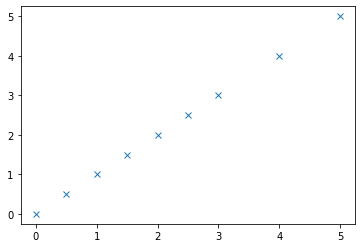

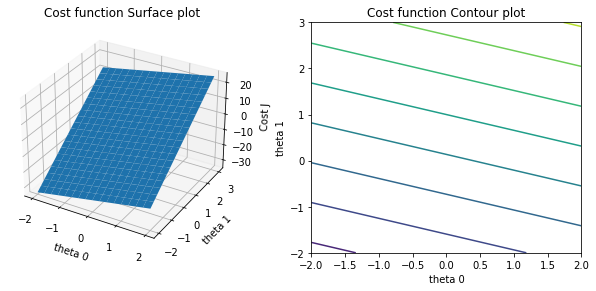

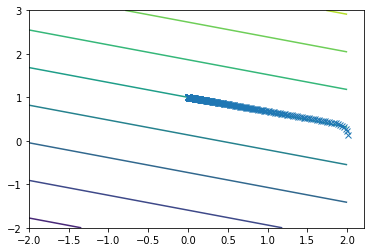

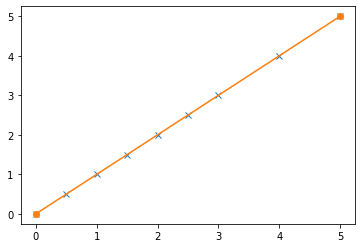

In [150]:
X, Y = init()
t = [2, 0]
a = 0.05  # learning parameter
m_steps = 1000  # number of iterations that the algorithm is running
test(t, X, Y, a, m_steps, True, True)


## Testing with low alpha
As we can see from the hypothesis function a low alpha value will not get even close to the expected predictions,
indeed they are still quite close to the given initial values [2,0]

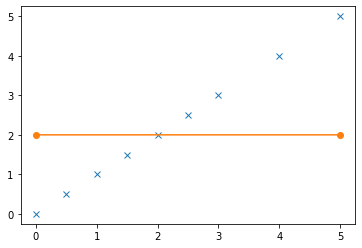

In [151]:
a = 1e-8  # learning parameter
m_steps = 1000  # number of iterations that the algorithm is running
test(t, X, Y, a, m_steps, False, False)

## Testing with high alpha
An alpha value too high will not make the method converge because it will tilt
around too quick without balancing its slope and rise.
Also, the predicted values are quite far from the data points, meaning the method failed.

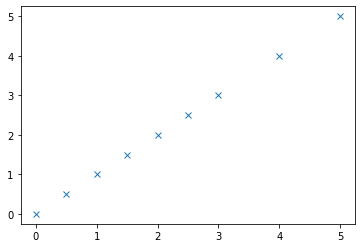

In [152]:
a = 1  # learning parameter
m_steps = 1000  # number of iterations that the algorithm is running
test(t, X, Y , a, m_steps, False, False)

## Finding absolute global minimum
**Can Linear Regression really find the absolute global minimum?**
There is no guarantee that the method can find the absolute global minimum without exceeding overfitting.
The reason for this is also the maximum amount of iterations taken and the intent of minimizing the loss
function.
However, with variations of the heuristic one can eventually escape local minima in search of the global one.


## Changing initial theta prediction
As we can see, with a good alpha value and enough iterations, the method will also eventually converge to the
correct theta values, and as we can see from the theta history the convergence is quite fast, too.

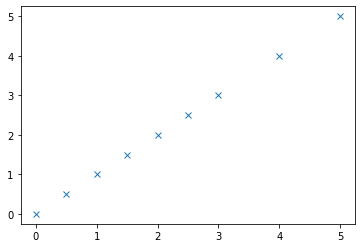

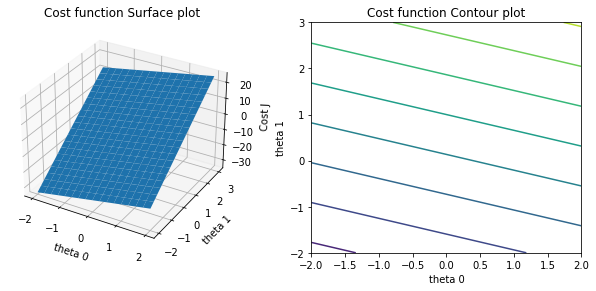

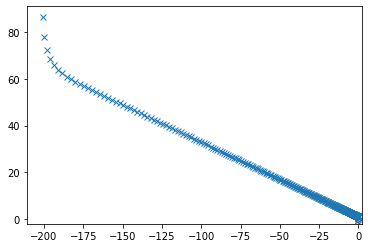

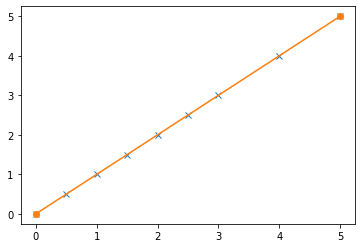

In [154]:
t = [-200, 100]
a = 0.05  # learning parameter
m_steps = 1000  # number of iterations that the algorithm is running
test(t, X, Y, a, m_steps, True, True)


## Updating theta0 and theta1 separately
All theta values needs to be updated together at the same time in order to "move"
the function line towards the right direction.
As we know the prediction of the trained model will return a linear function between x and theta,
as following : $$t_1 * x_i + t_0$$ , for every $x_i$  in $x$



## How many iterations to compute exact theta
To get exact theta values from the method a huge number of iterations with the most suitable alpha is needed

## Testing with noise
As we can see the method performs good with noised data and random initial theta

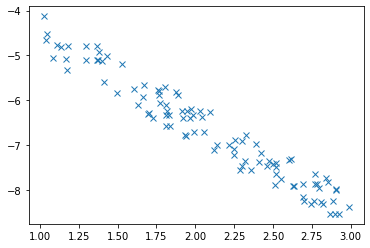

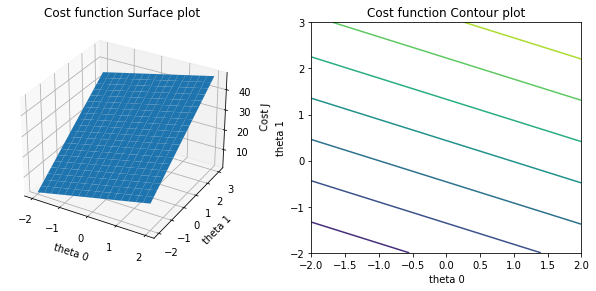

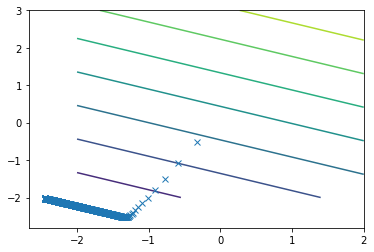

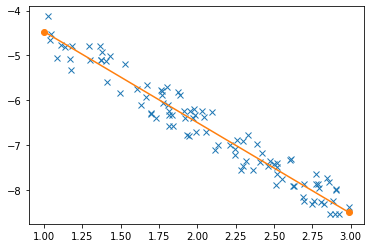

In [156]:
X, Y = init_coefficients(2,1,-2,-3)
t = np.random.rand(2,)
a = 0.05  # learning parameter
m_steps = 1000  # number of iterations that the algorithm is running
test(t, X, Y, a, m_steps, True, True)

